<a href="https://colab.research.google.com/github/ECV21/Course-Data-Analysis-with-Python-FreeCodeCamp/blob/main/E2_Introduction_to_Data_Analysis_FreeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Sakila Database
One of the best example databases out there is the Sakila Database, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

In [2]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [4]:
# estas dos líneas de código en un entorno de COLAB aseguran que haya un directorio
#llamado data creado y luego mueven el archivo sakila.db a ese directorio
!mkdir -p data
!mv sakila.db data/

In [5]:
#verificar que se haya cargado el archivo correctamente
!ls data

sakila.db


In [8]:
#guardar un consilta SQL en un dataframe

conn = sqlite3.connect('data/sakila.db') #Establece una conexión a la base de datos SQLite llamada sakila.db que está ubicada en el directorio data.

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [9]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [10]:
#ver dimensiones de la tabla

df.shape

(16044, 10)

In [11]:
#ver info general de la base

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [12]:
#Estadísitca descriptiva

df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


In [13]:
# Numerical analysis and visualization
#we'll analyze "film_rent_rate" column:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [ ]:
df['film_rental_rate'].mean()

In [ ]:
df['film_rental_rate'].median()

In [ ]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
df['film_rental_rate'].plot(kind='density', figsize=(14,6)) # kde

In [ ]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

#categorical analysis and visualization


We'll analyze the "rental_store_city" column:


In [ ]:
df['rental_store_city'].value_counts()

In [ ]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
ax = df['rental_store_city'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

#Column wrangling

We can also create new columns or modify existing ones:

#Add and calculate a new "rental_rate_retunr" column:
We want to know the rental rate of return of each film. To do that we'll use this formula:

 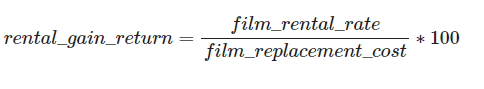


In [ ]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100

df['rental_gain_return'].head()

In [ ]:
df['rental_gain_return'].plot(kind='density', figsize=(14,6))

In [ ]:
df['rental_gain_return'].mean().round(2)

In [ ]:
df['rental_gain_return'].median().round(2)

In [ ]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['rental_gain_return'].mean(), color='red')
ax.axvline(df['rental_gain_return'].median(), color='green')

Each rental represents 13.6% of film cost.

So 7.35 rentals are needed to recover film market price (film_replacement_cost)

In [13]:
100 / 13.6

In [ ]:
#While in average each film is rented 16.74 times.
df['film_title'].value_counts().mean()

#selection and Indexing:

##Get the rental records of the customer with lastname HANSEN

In [ ]:
df.loc[df['customer_lastname'] == 'HANSEN']

#Create a list of all the films with the highest replacement cost

In [ ]:
df['film_replacement_cost'].max()

In [ ]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

How many PG or PG-13 rating filsm were rented?

In [ ]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]